In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/"

'assignment _2024-05-06 21:03:25.642552.pdf'
'Colab Notebooks'
 CV_.docx
 diabetes_dataset
 health_consent_form_.pdf
 IMG_1098.jpeg
 IMG_1099.jpeg
'IMG_1100 (1).jpeg'
 IMG_1100.jpeg
'IMG_1101 (1).jpeg'
 IMG_1101.jpeg
 IMG_1102.jpeg
 IMG_1103.jpeg
'OTOBO VICTOR IYAYE, Assignment 2.pdf'
'Otobo, Victor Iyaye.docx'
 Tc.pdf
'Term 1.rar'
 Untitled.pdf
'Victor Iyeya Otobo 14634365 EECT044 1_2024 Offer Letter.docx.pdf'


In [ ]:
!ls "/content/drive/My Drive/diabetes_dataset"

data-01  data-08  data-15  data-22  data-29  data-36  data-43  data-50	data-57  data-64
data-02  data-09  data-16  data-23  data-30  data-37  data-44  data-51	data-58  data-65
data-03  data-10  data-17  data-24  data-31  data-38  data-45  data-52	data-59  data-66
data-04  data-11  data-18  data-25  data-32  data-39  data-46  data-53	data-60  data-67
data-05  data-12  data-19  data-26  data-33  data-40  data-47  data-54	data-61  data-68
data-06  data-13  data-20  data-27  data-34  data-41  data-48  data-55	data-62  data-69
data-07  data-14  data-21  data-28  data-35  data-42  data-49  data-56	data-63  data-70


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

In [ ]:

# Set path to the folder containing your dataset
data_dir = "/content/drive/My Drive/diabetes_dataset"

# Get all file names that match "data-XX"
data_files = [f for f in os.listdir(data_dir) if f.startswith("data-")]

# Initialize an empty list to store DataFrames
df_list = []

# Read each file and append it to the list
for file in data_files:
    file_path = os.path.join(data_dir, file)

    try:
        # Read the file with tab delimiter
        df = pd.read_csv(file_path, delimiter="\t", header=None, names=["Date", "Time", "Glucose_Level", "Other_Value"])

        # Add a Patient_ID column to track the source file
        df["Patient_ID"] = file

        # Append the DataFrame to the list
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all data into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)

# Display the first few rows
print(final_df.head())

         Date   Time  Glucose_Level Other_Value Patient_ID
0  04-21-1991   9:09             58         100    data-01
1  04-21-1991   9:09             33           9    data-01
2  04-21-1991   9:09             34          13    data-01
3  04-21-1991  17:08             62         119    data-01
4  04-21-1991  17:08             33           7    data-01


In [ ]:
# Check basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           341 non-null    object 
 1   Time           341 non-null    object 
 2   Glucose_Level  341 non-null    int64  
 3   Other_Value    341 non-null    float64
 4   Patient_ID     341 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.4+ KB
None
Date             0
Time             0
Glucose_Level    0
Other_Value      0
Patient_ID       0
dtype: int64
       Glucose_Level  Other_Value
count     341.000000   341.000000
mean       41.208211    73.963343
std        11.623027   117.931739
min        33.000000     0.000000
25%        33.000000     1.500000
50%        34.000000     7.000000
75%        58.000000   129.000000
max        62.000000   400.000000


In [ ]:
print(final_df.columns)  # Show column names

# Assign Proper Column Names
final_df.columns = ["Date", "Time", "Glucose_Level", "Other_Value", "Patient_ID"]
print(final_df["Glucose_Level"].value_counts())

Index(['Date', 'Time', 'Glucose_Level', 'Other_Value', 'Patient_ID'], dtype='object')
Glucose_Level
33    9518
34    3830
58    3518
62    3160
60    2771
48    1883
35    1053
57     990
64     904
65     331
67     326
63     219
66     154
70     139
56     119
71      98
72      94
69      68
61      66
68      34
0       33
59      20
4        1
36       1
Name: count, dtype: int64


In [ ]:
# Step 2: Data Cleaning

# Convert 'Date' and 'Time' into a single Datetime column
final_df["Datetime"] = pd.to_datetime(final_df["Date"] + " " + final_df["Time"], errors="coerce")

# Drop the original 'Date' and 'Time' columns
final_df.drop(columns=["Date", "Time"], inplace=True)

# Convert 'Other_Value' to numeric, forcing errors to NaN
final_df["Other_Value"] = pd.to_numeric(final_df["Other_Value"], errors="coerce")

# Handle missing values: Remove rows where 'Datetime' is NaT
final_df = final_df.dropna(subset=["Datetime"])

# Drop rows with missing values in 'Other_Value' (only 8 rows affected)
final_df = final_df.dropna(subset=["Other_Value"])

# Replace or drop invalid Glucose_Level (e.g., 0 values)
final_df = final_df[final_df["Glucose_Level"] > 0]

# Sort by Datetime
final_df.sort_values(by="Datetime", inplace=True)

# Reset index
final_df.reset_index(drop=True, inplace=True)

# Display cleaned dataset info
print(final_df.info())
print(final_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Glucose_Level  29244 non-null  int64         
 1   Other_Value    29244 non-null  float64       
 2   Patient_ID     29244 non-null  object        
 3   Datetime       29244 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 914.0+ KB
None
   Glucose_Level  Other_Value Patient_ID            Datetime
0             58        134.0    data-68 1988-03-27 08:00:00
1             34         20.0    data-68 1988-03-27 08:00:00
2             60        158.0    data-68 1988-03-27 12:00:00
3             62        258.0    data-68 1988-03-27 18:00:00
4             34         20.0    data-68 1988-03-28 08:00:00


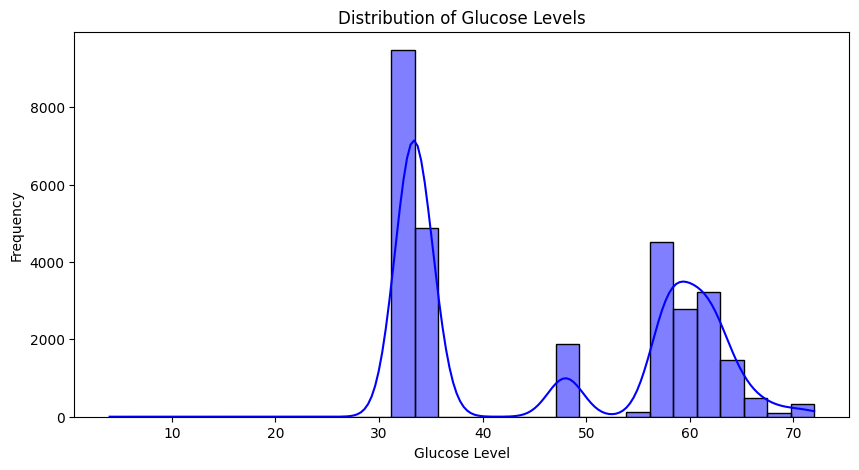

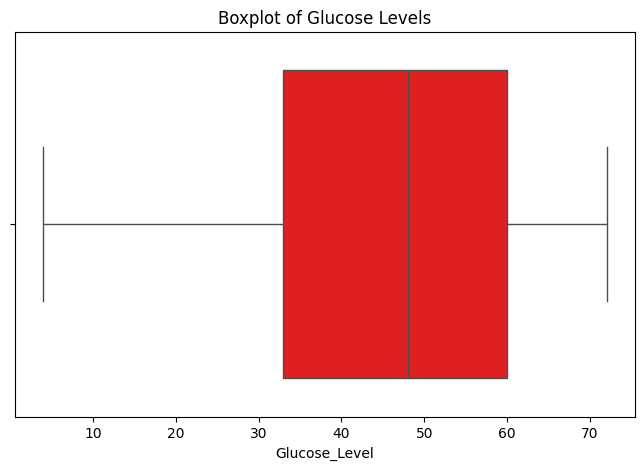

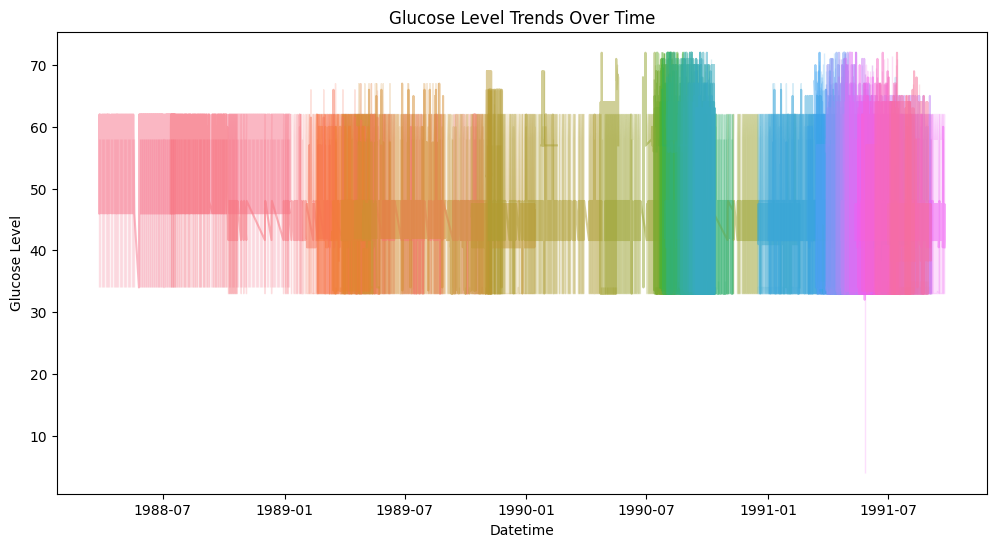

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Glucose Level Distribution
plt.figure(figsize=(10, 5))
sns.histplot(final_df["Glucose_Level"], bins=30, kde=True, color='blue')
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.show()

# Outlier Detection using Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_df["Glucose_Level"], color='red')
plt.title("Boxplot of Glucose Levels")
plt.show()

# Trend Analysis: Glucose Levels Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=final_df["Datetime"], y=final_df["Glucose_Level"], hue=final_df["Patient_ID"], alpha=0.5, legend=False)
plt.title("Glucose Level Trends Over Time")
plt.xlabel("Datetime")
plt.ylabel("Glucose Level")
plt.show()


In [ ]:
# Step 4: Feature Engineering

# Extract Date-Time Features
final_df["Hour"] = final_df["Datetime"].dt.hour
final_df["Day_of_Week"] = final_df["Datetime"].dt.dayofweek
final_df["Month"] = final_df["Datetime"].dt.month

# Rolling Statistics - Moving Average (window = 3 readings)
final_df["Glucose_RollingMean_3"] = final_df["Glucose_Level"].rolling(window=3, min_periods=1).mean()
final_df["Glucose_RollingStd_3"] = final_df["Glucose_Level"].rolling(window=3, min_periods=1).std()

# Lag Features - Previous Glucose Levels
final_df["Glucose_Lag_1"] = final_df["Glucose_Level"].shift(1)
final_df["Glucose_Lag_2"] = final_df["Glucose_Level"].shift(2)

# Handle missing values from lag features
final_df.fillna(method='bfill', inplace=True)

# Display updated dataset
print(final_df.info())
print(final_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Glucose_Level          29244 non-null  int64         
 1   Other_Value            29244 non-null  float64       
 2   Patient_ID             29244 non-null  object        
 3   Datetime               29244 non-null  datetime64[ns]
 4   Hour                   29244 non-null  int32         
 5   Day_of_Week            29244 non-null  int32         
 6   Month                  29244 non-null  int32         
 7   Glucose_RollingMean_3  29244 non-null  float64       
 8   Glucose_RollingStd_3   29244 non-null  float64       
 9   Glucose_Lag_1          29244 non-null  float64       
 10  Glucose_Lag_2          29244 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1), object(1)
memory usage: 2.1+ MB
None
   Glucose_Level  Other_Valu

<ipython-input-18-303e5bae2b7d>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df.fillna(method='bfill', inplace=True)


In [ ]:
# Step 5: Data Preprocessing for Modeling
# Encoding Categorical Features
label_encoder = LabelEncoder()
final_df["Patient_ID"] = label_encoder.fit_transform(final_df["Patient_ID"])

# Feature Scaling
scaler = StandardScaler()
scaled_features = ["Glucose_Level", "Other_Value", "Glucose_RollingMean_3", "Glucose_RollingStd_3", "Glucose_Lag_1", "Glucose_Lag_2"]
final_df[scaled_features] = scaler.fit_transform(final_df[scaled_features])

# Train-Test Split
X = final_df.drop(columns=["Glucose_Level", "Datetime"])
y = final_df["Glucose_Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display processed dataset info
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(23395, 9) (5849, 9)
(23395,) (5849,)


In [ ]:
# Step 6: Model Implementation

# 1. Linear Regression (Baseline Model)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Linear Regression Metrics
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("MSE:", mean_squared_error(y_test, lr_preds))
print("R² Score:", r2_score(y_test, lr_preds))

# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Random Forest Metrics
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, rf_preds))
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R² Score:", r2_score(y_test, rf_preds))

# 3. Artificial Neural Network (ANN)
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train ANN
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ANN Predictions
nn_preds = nn_model.predict(X_test)

# ANN Metrics
print("\nNeural Network Performance:")
print("MAE:", mean_absolute_error(y_test, nn_preds))
print("MSE:", mean_squared_error(y_test, nn_preds))
print("R² Score:", r2_score(y_test, nn_preds))


Linear Regression Performance:
MAE: 0.00011344090318044151
MSE: 1.957687380798086e-08
R² Score: 0.9999999806550122

Random Forest Performance:
MAE: 0.012561403955838085
MSE: 0.0048213974874457555
R² Score: 0.995235711455342
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


732/732 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6082 - mae: 0.9045 - val_loss: 0.0224 - val_mae: 0.1119
Epoch 2/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0141 - mae: 0.0899 - val_loss: 0.0054 - val_mae: 0.0577
Epoch 3/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0044 - mae: 0.0498 - val_loss: 0.0023 - val_mae: 0.0343
Epoch 4/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0023 - mae: 0.0353 - val_loss: 0.0039 - val_mae: 0.0545
Epoch 5/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0015 - mae: 0.0294 - val_loss: 0.0048 - val_mae: 0.0635
Epoch 6/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0025 - mae: 0.0371 - val_loss: 0.0023 - val_mae: 0.0397
Epoch 7/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0072 - mae: 0.0494 - val_loss: 0.0029 - val_mae: 0.0490
Epoch 8/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0023 - mae: 0.0339 - val_loss: 0.0025 - val_mae: 0.0435
Epoch 9/50
732/732 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 